#### Import Python Modules

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
#---------------------------------#
# Data and Manipulation
import numpy as np
import pandas as pd
#---------------------------------#
# Data Visualization
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)
color = sns.color_palette()
#---------------------------------#
# Regular Expression Module
import re
#---------------------------------#
# Natural Language Processing module
import nltk
from nltk.corpus import stopwords, wordnet
stop_words = set(nltk.corpus.stopwords.words('english'))
from nltk import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec, Phrases
import spacy
from wordcloud import WordCloud, STOPWORDS
#------------------------------------------#
# Machine Learning Modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import (Dense, Flatten, Embedding, Input, LSTM, Dropout,
                                     Activation, GRU, Bidirectional, GlobalMaxPool1D)
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
set_session(sess)
#---------------------------------#
# Other Modules
from bs4 import BeautifulSoup
import os
from importlib import reload
import sys
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")
#---------------------------------#

In [2]:
# Some Parameter Update For Visualization
small_size = 12
medium_size = 14
big_size = 16
large_size = 20

params = {
    'figure.figsize' : (14, 4),
    'font.size' : small_size,
    'xtick.labelsize' : medium_size,
    'ytick.labelsize' : medium_size,
    'legend.fontsize' : big_size ,
    'figure.titlesize' : large_size,
    'axes.titlesize' : medium_size,
    'axes.labelsize' : big_size,  
}

plt.rcParams.update(params)

In [3]:
# Files check
for file in os.listdir('data/'):
    print(file)

imdb_master.csv
labeledTrainData.tsv
sampleSubmission.csv
testData.tsv
unlabeledTrainData.tsv


In [4]:
# Load Data
use_cols = ['id','sentiment', 'review']
train_data = pd.read_csv(filepath_or_buffer = 'data/labeledTrainData.tsv', usecols = use_cols, sep='\t', quoting=3)
unlabeled_data = pd.read_csv(filepath_or_buffer = 'data/unlabeledTrainData.tsv', sep='\t', error_bad_lines = False)
test_data = pd.read_csv(filepath_or_buffer = 'data/testData.tsv', sep='\t')
imdb_master_data = pd.read_csv(filepath_or_buffer = 'data/imdb_master.csv', encoding='latin-1')

b'Skipping line 43043: expected 2 fields, saw 3\n'


In [5]:
# Clean IMDB data
imdb_master_data = imdb_master_data.drop(['type','file'], axis=1)
imdb_master_data.rename(columns = {'label' : 'sentiment', 'Unnamed: 0':'id'}, inplace=True)
imdb_master_data_unsup = imdb_master_data[imdb_master_data['sentiment']=='unsup']
imdb_master_data = imdb_master_data[imdb_master_data['sentiment']!='unsup']
mapping = {'pos': 1, 'neg':0}
imdb_master_data['sentiment'] = imdb_master_data['sentiment'].map(mapping)

In [6]:
# Information about every dataset 
datasets = [train_data, imdb_master_data, test_data, unlabeled_data, imdb_master_data_unsup]
titles = ['Train Data', 'Additional IMDB Data','Test Data','Unlabeled Train Data', 'Additional IMDB Data Unsup']
for dataset, title in zip(datasets, titles):
    print(title)
    dataset.info()
    display(dataset.head())

Train Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.0+ KB


,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


Additional IMDB Data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 3 columns):
id           50000 non-null int64
review       50000 non-null object
sentiment    50000 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


,id,review,sentiment
0,0,Once again Mr. Costner has dragged out a movie...,0
1,1,This is an example of why the majority of acti...,0
2,2,"First of all I hate those moronic rappers, who...",0
3,3,Not even the Beatles could write songs everyon...,0
4,4,Brass pictures (movies is not a fitting word f...,0


Test Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
id        25000 non-null object
review    25000 non-null object
dtypes: object(2)
memory usage: 390.7+ KB


,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


Unlabeled Train Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 2 columns):
id        49998 non-null object
review    49998 non-null object
dtypes: object(2)
memory usage: 781.3+ KB


,id,review
0,9999_0,"Watching Time Chasers, it obvious that it was ..."
1,45057_0,I saw this film about 20 years ago and remembe...
2,15561_0,"Minor Spoilers<br /><br />In New York, Joan Ba..."
3,7161_0,I went to see this film with a great deal of e...
4,43971_0,"Yes, I agree with everyone on this site this m..."


Additional IMDB Data Unsup
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 50000 to 99999
Data columns (total 3 columns):
id           50000 non-null int64
review       50000 non-null object
sentiment    50000 non-null object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


,id,review,sentiment
50000,50000,"I admit, the great majority of films released ...",unsup
50001,50001,"Take a low budget, inexperienced actors doubli...",unsup
50002,50002,"Everybody has seen 'Back To The Future,' right...",unsup
50003,50003,Doris Day was an icon of beauty in singing and...,unsup
50004,50004,"After a series of silly, fun-loving movies, 19...",unsup


In [7]:
# Join Training data and IMDB data
train_data_with_imdb = pd.concat([train_data, imdb_master_data]).reset_index(drop=True)

In [8]:
# Indivisual Shape Of Train and Imdb Data
print('Train Data Shape : '+str(train_data.shape))
print('IMDB Data Shape : '+str(imdb_master_data.shape))
print('IMDB Data Shape Unsup: '+str(imdb_master_data_unsup.shape))
print('Train and imdb combiled Data Shape : '+str(train_data_with_imdb.shape))

Train Data Shape : (25000, 3)
IMDB Data Shape : (50000, 3)
IMDB Data Shape Unsup: (50000, 3)
Train and imdb combiled Data Shape : (75000, 3)


In [9]:
# Total Number Of Review
all_reviews = np.array([], dtype=str)
for dataset in datasets:
    all_reviews = np.concatenate((all_reviews, dataset.review), axis=0)
print('Total number of reviews:', len(all_reviews))

Total number of reviews: 199998


#### Exploratory Analysis

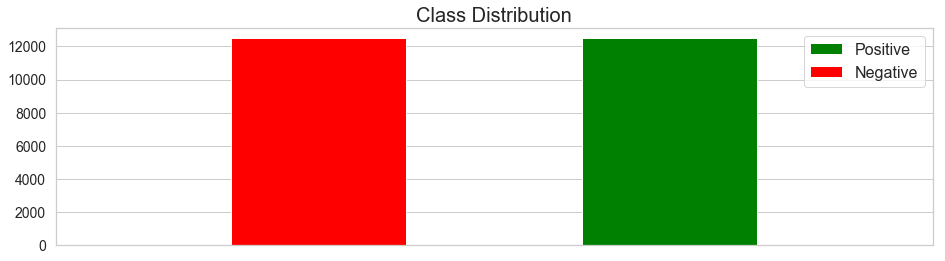

In [10]:
# Positive Negative Sentiment Ratio Of Training Data
plt.hist(train_data[train_data['sentiment']==1].sentiment, bins=2, color="green", label='Positive')
plt.hist(train_data[train_data['sentiment']==0].sentiment, bins=2, color="Red", label='Negative')
plt.title("Class Distribution", fontsize = large_size)
plt.xticks([])
plt.xlim(-0.5, 2)
plt.legend()
plt.show()

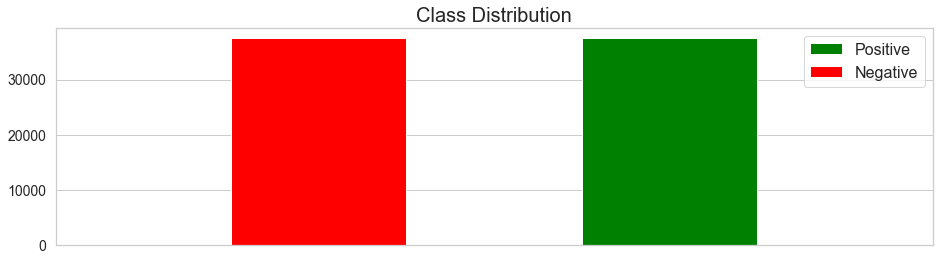

In [11]:
# Positive Negative Sentiment Ratio Of Combined Data
plt.hist(train_data_with_imdb[train_data_with_imdb['sentiment']==1].sentiment, bins=2, color="green", label='Positive')
plt.hist(train_data_with_imdb[train_data_with_imdb['sentiment']==0].sentiment, bins=2, color="Red", label='Negative')
plt.title("Class Distribution", fontsize = large_size)
plt.xticks([])
plt.xlim(-0.5, 2)
plt.legend()
plt.show()

In [12]:
train_data['review'][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

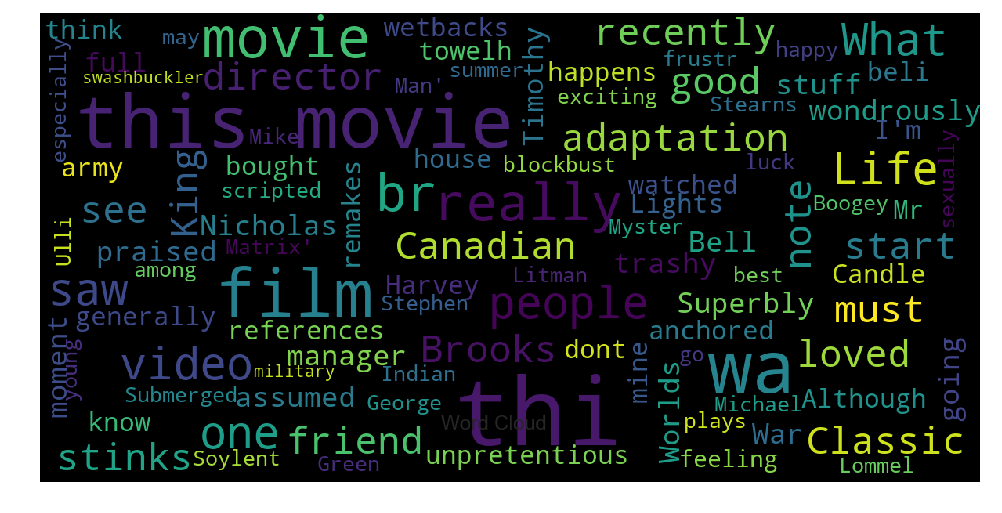

In [40]:
# Word Cloud Visualization
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = 'Word Cloud'):
    wordcloud = WordCloud(
                background_color='black',
                stopwords=stopwords,
                max_words=100,
                max_font_size=40, 
                scale=3,
                random_state=1).generate(str(data))

    fig = plt.figure(1, figsize=(15, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(train_data_with_imdb["review"])

#### Data Cleaning and Transformation

In [14]:
# ----------------------------------- Function to clean the review ----------------------------
# Remove HTML/XML Tags and get plain text
def markup_to_text(text_with_markup_tag):
    text_without_markup_tag = BeautifulSoup(text_with_markup_tag, features = "lxml").get_text()
    
    if len(text_without_markup_tag) == 0 :
        text_without_markup_tag = text_with_markup_tag
    
    text_without_markup_tag = re.sub(r"\<.*\>", "", text_without_markup_tag)
    
    try :
        text_without_markup_tag = text_without_markup_tag.encode(encoding = 'ascii', errors = 'ignore')\
                                   .decode(encoding = 'ascii')
    except UnicodeDecodeError:
        text_without_markup_tag = text_without_markup_tag.encode(encoding = 'ascii', errors = 'ignore')
    
    return text_without_markup_tag 

# Output string with only letters
def only_letter(text) :
    return re.sub('[^a-zA-Z]', ' ', text)

# Output Only lower Case Letter
def lower_case(text) :
    return text.lower()

# Remove Stop Words
def remove_stop_word(text):
    words = text.split()
    meaningful_word = [w for w in words if not w in stop_words]
    return (" ".join(meaningful_word))

# Word Parts Of Speech
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Word Lemmatization
def word_lemmatization(text, show_progress : bool = True):
    if show_progress:
        global counter
        counter += 1
        if counter%1000 == 0 :
            print('Processing ... %d\n'%(counter), end='\r')
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatization_output = ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words])
    return lemmatization_output

In [44]:
%%time
# Clean Training Data
clean_train_data = train_data.copy()
print("Copy Finish")
clean_train_data['review'] = clean_train_data['review'].apply(markup_to_text)
print("Removing HTML/XML Tag Finish")
clean_train_data['review'] = clean_train_data['review'].apply(only_letter)
print("Considering only letters Finish")
clean_train_data['review'] = clean_train_data['review'].apply(lower_case)
print("Upper case to lower case conversion Finish")
clean_train_data['review'] = clean_train_data['review'].apply(remove_stop_word)
print("Removing stop words Finish")

counter = 0
clean_train_data['review'] = clean_train_data['review'].apply(word_lemmatization)
print("Word lemmatization Finish")

clean_train_data.to_csv('clean_train_data.csv', index=None)

Copy Finish
Removing HTML/XML Tag Finish
Considering only letters Finish
Upper case to lower case conversion Finish
Removing stop words Finish
Word lemmatization Finish


In [48]:
%%time
# Clean Test Data
clean_test_data = test_data.copy()
print("Copy Finish")
clean_test_data['review'] = clean_test_data['review'].apply(markup_to_text)
print("Removing HTML/XML Tag Finish")
clean_test_data['review'] = clean_test_data['review'].apply(only_letter)
print("Considering only letters Finish")
clean_test_data['review'] = clean_test_data['review'].apply(lower_case)
print("Upper case to lower case conversion Finish")
clean_test_data['review'] = clean_test_data['review'].apply(remove_stop_word)
print("Removing stop words Finish")

counter = 0
clean_test_data['review'] = clean_test_data['review'].apply(word_lemmatization)
print("Word lemmatization Finish")

clean_test_data.to_csv('clean_test_data.csv', index=None)

Copy Finish
Removing HTML/XML Tag Finish
Considering only letters Finish
Upper case to lower case conversion Finish
Removing stop words Finish
Word lemmatization Finish
Wall time: 28min 38s


In [16]:
%%time
# Clean Training Data
clean_train_data_with_imdb = train_data_with_imdb.copy()
print("Copy Finish")
clean_train_data_with_imdb['review'] = clean_train_data_with_imdb['review'].apply(markup_to_text)
print("Removing HTML/XML Tag Finish")
clean_train_data_with_imdb['review'] = clean_train_data_with_imdb['review'].apply(only_letter)
print("Considering only letters Finish")
clean_train_data_with_imdb['review'] = clean_train_data_with_imdb['review'].apply(lower_case)
print("Upper case to lower case conversion Finish")
clean_train_data_with_imdb['review'] = clean_train_data_with_imdb['review'].apply(remove_stop_word)
print("Removing stop words Finish")
counter = 0
clean_train_data_with_imdb['review'] = clean_train_data_with_imdb['review'].apply(word_lemmatization)
print("Word lemmatization Finish")

clean_train_data_with_imdb.to_csv('clean_train_data_with_imdb.csv', index=None)

Copy Finish
Removing HTML/XML Tag Finish
Considering only letters Finish
Upper case to lower case conversion Finish
Removing stop words Finish
Processing ... 1000
Processing ... 2000
Processing ... 3000
Processing ... 4000
Processing ... 5000
Processing ... 6000
Processing ... 7000
Processing ... 8000
Processing ... 9000
Processing ... 10000
Processing ... 11000
Processing ... 12000
Processing ... 13000
Processing ... 14000
Processing ... 15000
Processing ... 16000
Processing ... 17000
Processing ... 18000
Processing ... 19000
Processing ... 20000
Processing ... 21000
Processing ... 22000
Processing ... 23000
Processing ... 24000
Processing ... 25000
Processing ... 26000
Processing ... 27000
Processing ... 28000
Processing ... 29000
Processing ... 30000
Processing ... 31000
Processing ... 32000
Processing ... 33000
Processing ... 34000
Processing ... 35000
Processing ... 36000
Processing ... 37000
Processing ... 38000
Processing ... 39000
Processing ... 40000
Processing ... 41000
Proce

In [34]:
%%time
# Clean Training Data
clean_imdb_master_data_unsup = imdb_master_data_unsup.copy()
print("Copy Finish")
clean_imdb_master_data_unsup['review'] = clean_imdb_master_data_unsup['review'].apply(markup_to_text)
print("Removing HTML/XML Tag Finish")
clean_imdb_master_data_unsup['review'] = clean_imdb_master_data_unsup['review'].apply(only_letter)
print("Considering only letters Finish")
clean_imdb_master_data_unsup['review'] = clean_imdb_master_data_unsup['review'].apply(lower_case)
print("Upper case to lower case conversion Finish")
clean_imdb_master_data_unsup['review'] = clean_imdb_master_data_unsup['review'].apply(remove_stop_word)
print("Removing stop words Finish")
counter = 0
clean_imdb_master_data_unsup['review'] = clean_imdb_master_data_unsup['review'].apply(word_lemmatization)
print("Word lemmatization Finish")

clean_imdb_master_data_unsup.to_csv('clean_imdb_master_data_unsup.csv', index=None)

#### Load Clean and Transformed Data

In [14]:
# Load Clean and Transformed Data
clean_test_data = pd.read_csv('clean_test_data.csv')
clean_train_data_with_imdb = pd.read_csv('clean_train_data_with_imdb.csv')
clean_imdb_master_data_unsup = pd.read_csv('clean_imdb_master_data_unsup.csv')

In [16]:
clean_train_data_with_imdb.head()

,id,review,sentiment
0,"""5814_8""",stuff go moment mj start listen music watch od...,1
1,"""2381_9""",classic war world timothy hines entertain film...,1
2,"""7759_3""",film start manager nicholas bell give welcome ...,0
3,"""3630_4""",must assume praise film great film opera ever ...,0
4,"""9495_8""",superbly trashy wondrously unpretentious explo...,1


In [42]:
# checking null value in the data of train and test
clean_train_data_with_imdb.isnull().sum(), test_data.isnull().sum()

(id           0
 review       0
 sentiment    0
 dtype: int64, id           0
 review       0
 sentiment    0
 dtype: int64)

#### Word Ebmadding Technique

In [43]:
## Word One-Hot Encoding
max_features_number = 10000
tokenizer = Tokenizer(num_words = max_features_number)
tokenizer.fit_on_texts(clean_train_data_with_imdb['review'])
list_of_tokenized_train_data = tokenizer.texts_to_sequences(clean_train_data_with_imdb['review'])
# Padding
max_len = int(clean_train_data_with_imdb['review'].apply(lambda x : len(x.split(" "))).mean())
X = pad_sequences(list_of_tokenized_train_data, maxlen = max_len)
y = clean_train_data_with_imdb['sentiment']

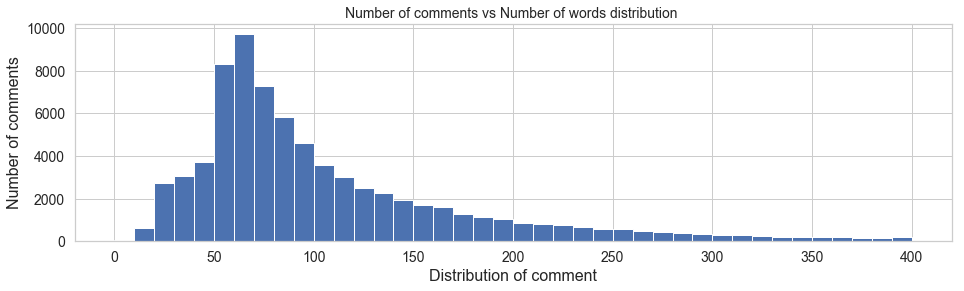

In [44]:
# Distribution Of Word per Comment
totalNumWords = [len(one_comment) for one_comment in list_of_tokenized_train_data]
plt.hist(totalNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.xlabel("Distribution of comment")
plt.ylabel("Number of comments")
plt.title("Number of comments vs Number of words distribution ")
plt.show()

In [45]:
# Train Test Spelit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [46]:
# Model Layers 1. Embedding 2. Bidirectional 3. GlobalMaxPool 4. Dense 5. Dropout
embed_size = max_len
model = Sequential()
model.add(Embedding(max_features_number, embed_size))
model.add(Bidirectional(LSTM(32, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(20, activation = "relu"))
model.add(Dropout(0.05))
model.add(Dense(1, activation = "sigmoid"))

# Model Run
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics=["accuracy"])
batch_size = 50
epochs = 3
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/3
48000/48000 [==============================] - 407s 8ms/sample - loss: 0.3148 - acc: 0.8655 - val_loss: 0.2504 - val_acc: 0.8979
Epoch 2/3
48000/48000 [==============================] - 375s 8ms/sample - loss: 0.1784 - acc: 0.9351 - val_loss: 0.2373 - val_acc: 0.9105
Epoch 3/3
48000/48000 [==============================] - 392s 8ms/sample - loss: 0.1098 - acc: 0.9620 - val_loss: 0.2537 - val_acc: 0.9133


In [47]:
# Check Accuracy using 20% test data seperated from training data
prediction = model.predict(X_test)
y_pred = (prediction > 0.5)
print('F1 Score {0}'.format(f1_score(y_pred, y_test)))
print('\nAUC Score : '+ str(roc_auc_score(y_test, y_pred)))

F1 Score 0.9144086599878974

AUC Score : 0.9151376225491656


In [48]:
# Plot Confusion Matrix Function
def plot_confusion_matrix(y_true, y_pred, ax, class_names, vmax=None,
                          normed=True, title='Confusion matrix'):
    matrix = confusion_matrix(y_true,y_pred)
    if normed:
        matrix = (matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])
    sns.heatmap(matrix, vmax=vmax, annot=True, square=True, ax=ax,
               cmap=plt.cm.Blues_r, cbar=False, linecolor='black',
               linewidths=1, xticklabels=class_names)
    ax.set_title(title, y=1.20, fontsize=16)
    ax.set_ylabel('True labels', fontsize=12)
    ax.set_xlabel('Predicted labels', y=1.10, fontsize=12)
    ax.set_yticklabels(class_names, rotation=0)

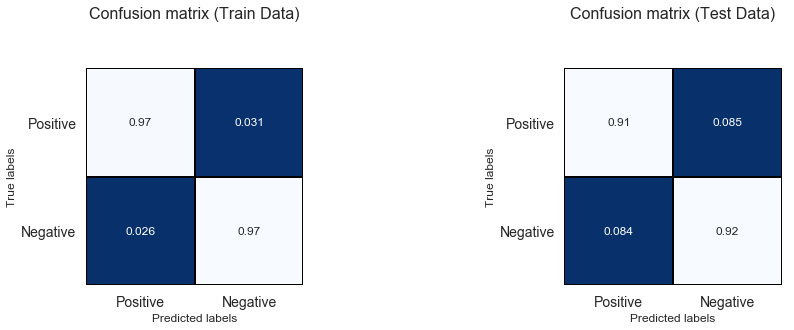

In [50]:
# Confusion Matrix
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2)
plot_confusion_matrix(y_train, y_train_pred, ax=axis1,
                      title='Confusion matrix (Train Data)',
                      class_names=['Positive', 'Negative'])
plot_confusion_matrix(y_test, y_test_pred, ax=axis2,
                      title='Confusion matrix (Test Data)',
                      class_names=['Positive', 'Negative'])

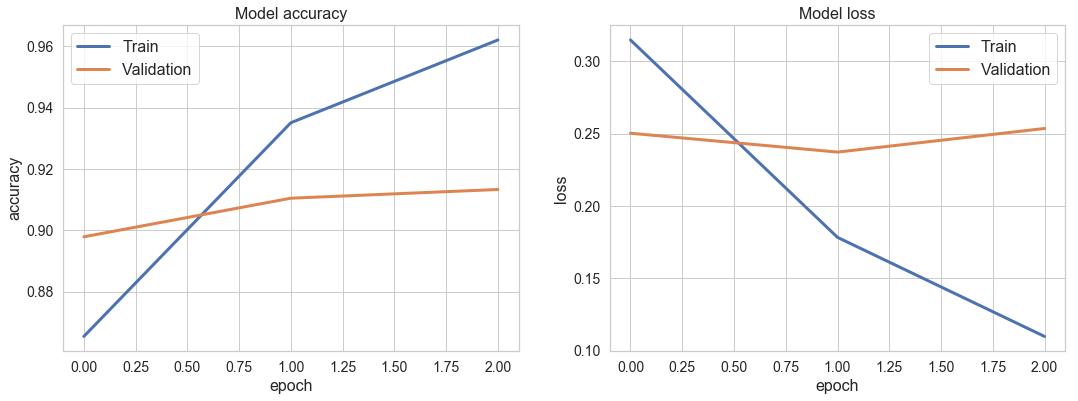

In [51]:
# Visualize Model Accuracy and Loss 
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# summarize history for accuracy
axis1.plot(history.history['acc'], label='Train', linewidth=3)
axis1.plot(history.history['val_acc'], label='Validation', linewidth=3)
axis1.set_title('Model accuracy', fontsize=16)
axis1.set_ylabel('accuracy')
axis1.set_xlabel('epoch')
axis1.legend(loc='upper left')

# summarize history for loss
axis2.plot(history.history['loss'], label='Train', linewidth=3)
axis2.plot(history.history['val_loss'], label='Validation', linewidth=3)
axis2.set_title('Model loss', fontsize=16)
axis2.set_ylabel('loss')
axis2.set_xlabel('epoch')
axis2.legend(loc='upper right')
plt.show()

In [52]:
# Original Test Data Transformation
tokenizer.fit_on_texts(test_data['review'])
list_of_tokenized_test_data = tokenizer.texts_to_sequences(test_data['review'])
# Padding
X_test_original = pad_sequences(list_of_tokenized_test_data, maxlen= max_len)

In [53]:
# Original Test Data Prediction
test_prediction = model.predict_classes(X_test_original)
#y_test_original = (test_prediction > 0.5)
print(test_prediction)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


In [54]:
def submit(predictions):
    test_data['sentiment'] = predictions
    test_data.to_csv('submission_embedding.csv', index=False, columns=['id','sentiment'])

submit(test_prediction)

#### nGram Technique

In [16]:
#Array Of Word Per Review
clean_train_data_with_imdb_test_and_unsup = pd.concat([clean_train_data_with_imdb[['id','review']],\
                                                       imdb_master_data_unsup[['id','review']], \
                                                       test_data]).reset_index(drop=True)
all_reviews = clean_train_data_with_imdb_test_and_unsup['review'].apply(lambda x : x.split(' ')).to_numpy()

In [17]:
clean_train_data_with_imdb_test_and_unsup.shape

(150000, 2)

In [18]:
%%time
# Bigrams
bigrams = Phrases(sentences = all_reviews)

Wall time: 56.1 s


In [19]:
# Check bigram result
bigrams['space station near the solar system'.split(' ')]

['space_station', 'near', 'the', 'solar_system']

In [20]:
%%time
#Trigrams
trigrams = Phrases(sentences = bigrams[all_reviews])

Wall time: 2min 40s


#### Word2Vec Technique

In [21]:
%%time
embedding_vector_size = 256
trigrams_model = Word2Vec(sentences = trigrams[bigrams[all_reviews]],
                         size = embedding_vector_size,
                         min_count = 3,
                         window = 5,
                         workers = 4)

Wall time: 23min 8s


In [22]:
print("Vocabulary Size : ", len(trigrams_model.wv.vocab))

Vocabulary Size :  273637


In [23]:
# Check Word2Vec model 
trigrams_model.wv.most_similar('man')

[('man,', 0.6237987279891968),
 ('man_who', 0.5586242079734802),
 ('person', 0.5584558248519897),
 ('woman', 0.5534559488296509),
 ('guy', 0.5475595593452454),
 ('young_man', 0.5377113819122314),
 ('man.', 0.5331538915634155),
 ('black_man', 0.5310970544815063),
 ('men', 0.5075743198394775),
 ('white_man', 0.5003026127815247)]

In [26]:
# Check disimilar words
trigrams_model.wv.doesnt_match(['galaxy','starship','planet','dog'])

'dog'

In [24]:
def vectorize_data(data, vocab):
    
    print('Vectorize sentences...', end='\r')
    keys = list(vocab.keys())
    filter_unknown = lambda word: vocab.get(word, None) is not None
    encode = lambda review: list(map(keys.index, filter(filter_unknown, review)))
    vectorized = list(map(encode, data))
    print('Vectorize sentences... (done)')
    return vectorized

print('Convert sentences to sentences with ngrams...', end='\r')
X_data = trigrams[bigrams[all_reviews[0:75000]]]
print('Convert sentences to sentences with ngrams... (done)')
input_length = 150
X_pad = pad_sequences(
    sequences=vectorize_data(X_data, vocab=trigrams_model.wv.vocab),
    maxlen=input_length,
    padding='post')
print('Transform sentences to sequences... (done)')   

Convert sentences to sentences with ngrams... (done)
Vectorize sentences... (done)
Transform sentences to sequences... (done)


In [69]:
def vectorize_data(data, vocab):
    
    print('Vectorize sentences...', end='\r')
    keys = list(vocab.keys())
    print(keys)
    filter_unknown = lambda word: vocab.get(word, None) is not None
    print(filter_unknown)
    encode = lambda review: list(map(keys.index, filter(filter_unknown, review)))
    print(encode)
    vectorized = list(map(encode, data))
    print('Vectorize sentences... (done)')
    return vectorized

print('Convert sentences to sentences with ngrams...', end='\r')
X_data = trigrams[bigrams[all_reviews[0:75000]]]
print('Convert sentences to sentences with ngrams... (done)')
input_length = 150
X_pad = pad_sequences(
    sequences=vectorize_data(X_data[0], vocab=trigrams_model.wv.vocab),
    maxlen=input_length,
    padding='post')
print('Transform sentences to sequences... (done)')

Convert sentences to sentences with ngrams... (done)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Vectorize sentences... (done)
Transform sentences to sequences... (done)


In [70]:
sequences=vectorize_data(X_data[0], vocab=trigrams_model.wv.vocab)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Vectorize sentences... (done)


In [68]:
lambda word : trigrams_model.wv.vocab.get('taimur', None) is not None

<function __main__.<lambda>(word)>

In [63]:
X_data[0]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen_music',
 'watch',
 'odd',
 'documentary',
 'watch',
 'wiz',
 'watch',
 'moonwalker',
 'maybe',
 'want',
 'get',
 'certain',
 'insight',
 'guy',
 'thought',
 'really',
 'cool',
 'eighty',
 'maybe',
 'make',
 'mind',
 'whether',
 'guilty_innocent',
 'moonwalker',
 'part',
 'biography',
 'part',
 'feature',
 'film',
 'remember',
 'go',
 'see',
 'cinema',
 'originally_release',
 'subtle_message',
 'mj',
 'feel',
 'towards',
 'press',
 'also',
 'obvious',
 'message',
 'drug',
 'bad',
 'kay',
 'visually_impressive',
 'course',
 'michael_jackson',
 'unless',
 'remotely',
 'like',
 'mj',
 'anyway',
 'go',
 'hate',
 'find',
 'boring',
 'may',
 'call',
 'mj',
 'egotist',
 'consent',
 'make',
 'movie',
 'mj',
 'fan',
 'would',
 'say',
 'make',
 'fan',
 'true',
 'really',
 'nice',
 'actual',
 'feature',
 'film',
 'bit',
 'finally',
 'start',
 'minute',
 'exclude',
 'smooth_criminal_sequence',
 'joe_pesci',
 'convincing',
 'psychopathic',
 'powe

In [64]:
X_pad[0]

array([ 42,  43,  44,  45,  46,  47,  48,   3,  49,   1,  50,  51,  52,
        53,  54,   3,  55,  56,  21,  57,   3,  58,  59,  60,  21,  58,
        61,  18,  62,  63,  27,  28,  64,  65,   4,  66,  67,  68,  69,
        70,  71,  72,  73,  12,   3,  74,  41,  75,   3,  76,  77,  78,
        69,  79,  80,  12,  81,  82,  83,  40,  84,  85,  11,  50,   3,
        86,  87,  19,  88,  48,   3,  89,  90,  91,  92,  93,  94,  37,
        95,  96,  97,  98,  99,  28, 100,  41,  94, 101,  95,  50, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111,  57,  81,  48,   3,
       103, 112, 113, 114,  81, 115, 116, 117, 118,  39, 119,   3, 120,
       121,  57, 122,  45, 123, 103, 124,  81, 125, 126, 127, 128, 129,
       117, 130, 131, 128,  82,  81, 132, 133,  82, 134, 135, 136,  62,
       137,  16, 103, 138, 139, 140, 141])

In [62]:
list(trigrams_model.wv.vocab.keys())

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen_music',
 'watch',
 'odd',
 'documentary',
 'wiz',
 'moonwalker',
 'maybe',
 'want',
 'get',
 'certain',
 'insight',
 'guy',
 'thought',
 'really',
 'cool',
 'eighty',
 'make',
 'mind',
 'whether',
 'guilty_innocent',
 'part',
 'biography',
 'feature',
 'film',
 'remember',
 'see',
 'cinema',
 'originally_release',
 'subtle_message',
 'feel',
 'towards',
 'press',
 'also',
 'obvious',
 'message',
 'drug',
 'bad',
 'kay',
 'visually_impressive',
 'course',
 'michael_jackson',
 'unless',
 'remotely',
 'like',
 'anyway',
 'hate',
 'find',
 'boring',
 'may',
 'call',
 'egotist',
 'consent',
 'movie',
 'fan',
 'would',
 'say',
 'true',
 'nice',
 'actual',
 'bit',
 'finally',
 'minute',
 'exclude',
 'smooth_criminal_sequence',
 'joe_pesci',
 'convincing',
 'psychopathic',
 'powerful',
 'drug_lord',
 'dead',
 'beyond',
 'overheard',
 'plan',
 'nah',
 'character',
 'rant',
 'people',
 'know',
 'supply',
 'etc',
 'dunno',
 'music',
 'lot',
 '

In [25]:
train_data_with_imdb.shape

(75000, 3)

In [26]:
Y_train_data = train_data_with_imdb.sentiment.values
X_train, X_test, y_train, y_test = train_test_split(
    X_pad,
    Y_train_data,
    test_size=0.05,
    shuffle=True,
    random_state=42)

In [29]:
def build_model(embedding_matrix: np.ndarray, input_length: int):
    model = Sequential()
    model.add(Embedding(
        input_dim = embedding_matrix.shape[0],
        output_dim = embedding_matrix.shape[1], 
        input_length = input_length,
        weights = [embedding_matrix],
        trainable=False))
    model.add(Bidirectional(LSTM(128, recurrent_dropout=0.1)))
    model.add(Dropout(0.25))
    model.add(Dense(64))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    return model

model = build_model(
    embedding_matrix=trigrams_model.wv.vectors,
    input_length=input_length)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 256)          70051072  
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               394240    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)      

In [35]:
model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy'])

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=20)

Train on 71250 samples, validate on 3750 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
71250/71250 [==============================] - 632s 9ms/sample - loss: 0.5400 - acc: 0.7246 - val_loss: 0.4368 - val_acc: 0.7989
Epoch 2/20
71250/71250 [==============================] - 393s 6ms/sample - loss: 0.4143 - acc: 0.8150 - val_loss: 0.3788 - val_acc: 0.8333
Epoch 3/20
71250/71250 [==============================] - 420s 6ms/sample - loss: 0.3455 - acc: 0.8516 - val_loss: 0.3250 - val_acc: 0.8565
Epoch 4/20
71250/71250 [==============================] - 411s 6ms/sample - loss: 0.2853 - acc: 0.8820 - val_loss: 0.3134 - val_acc: 0.8712
Epoch 5/20
71250/71250 [==============================] - 423s 6ms/sample - loss: 0.2258 - acc: 0.9100 - val_loss: 0.3149 - val_acc: 0.8725
Epoch 6/20
71250/71250 [==============================] - 418s 6ms/sample - loss: 0.1821 - acc: 0.9281 - val_loss: 0.2627 - val_acc: 0.8989
Epoch 7/20
71250/71250 [==============================] - 410s 

In [36]:
model.save('model/word2vec_lstm_model.h5')

In [27]:
word2vec_lstm_model = load_model('model/word2vec_lstm_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [28]:
%%time
y_train_pred = word2vec_lstm_model.predict_classes(X_train)
y_test_pred = word2vec_lstm_model.predict_classes(X_test)

Wall time: 7min


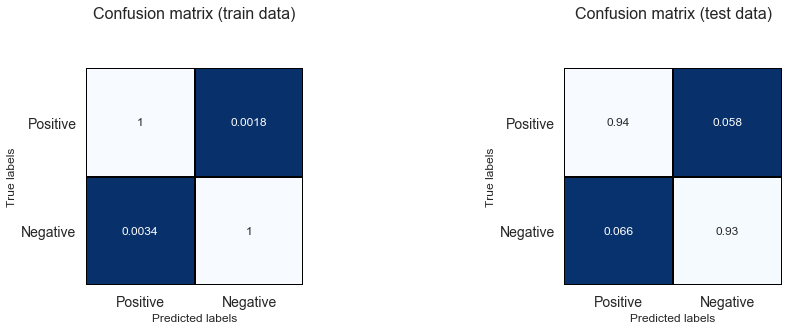

In [31]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2)
plot_confusion_matrix(y_train, y_train_pred, ax=axis1,
                      title='Confusion matrix (train data)',
                      class_names=['Positive', 'Negative'])
plot_confusion_matrix(y_test, y_test_pred, ax=axis2,
                      title='Confusion matrix (test data)',
                      class_names=['Positive', 'Negative'])

In [39]:
# Accuracy and Loss Fractuation
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
# summarize history for accuracy
axis1.plot(history.history['acc'], label='Train', linewidth=3)
axis1.plot(history.history['val_acc'], label='Validation', linewidth=3)
axis1.set_title('Model accuracy', fontsize=16)
axis1.set_ylabel('accuracy')
axis1.set_xlabel('epoch')
axis1.legend(loc='upper left')

# summarize history for loss
axis2.plot(history.history['loss'], label='Train', linewidth=3)
axis2.plot(history.history['val_loss'], label='Validation', linewidth=3)
axis2.set_title('Model loss', fontsize=16)
axis2.set_ylabel('loss')
axis2.set_xlabel('epoch')
axis2.legend(loc='upper right')
plt.show()

In [33]:
print('Convert sentences to sentences with ngrams...', end='\r')
X_submit = trigrams[bigrams[all_reviews[75000:100000]]]
print('Convert sentences to sentences with ngrams... (done)')
X_sub = pad_sequences(
    sequences=vectorize_data(X_submit, vocab=trigrams_model.wv.vocab),
    maxlen=input_length,
    padding='post')
print('Transform sentences to sequences... (done)')

Convert sentences to sentences with ngrams... (done)
Vectorize sentences... (done)
Transform sentences to sequences... (done)


In [34]:
%%time
Y_sub_pred = word2vec_lstm_model.predict_classes(X_sub)

Wall time: 2min 47s
Parser   : 266 ms


In [35]:
def submit(predictions):
    test_data['sentiment'] = predictions
    test_data.to_csv('submission.csv', index=False, columns=['id','sentiment'])

submit(Y_sub_pred)

In [36]:
test_data

,id,review,sentiment
0,12311_10,Naturally in a film who's main themes are of m...,1
1,8348_2,This movie is a disaster within a disaster fil...,1
2,5828_4,"All in all, this is a movie for kids. We saw i...",1
3,7186_2,Afraid of the Dark left me with the impression...,1
4,12128_7,A very accurate depiction of small time mob li...,1
5,2913_8,"...as valuable as King Tut's tomb! (OK, maybe ...",1
6,4396_1,This has to be one of the biggest misfires eve...,1
7,395_2,"This is one of those movies I watched, and won...",1
8,10616_1,The worst movie i've seen in years (and i've s...,1
9,9074_9,"Five medical students (Kevin Bacon, David Labr...",1


In [38]:
test_data

,id,review,sentiment
0,12311_10,Naturally in a film who's main themes are of m...,1
1,8348_2,This movie is a disaster within a disaster fil...,1
2,5828_4,"All in all, this is a movie for kids. We saw i...",1
3,7186_2,Afraid of the Dark left me with the impression...,1
4,12128_7,A very accurate depiction of small time mob li...,1
5,2913_8,"...as valuable as King Tut's tomb! (OK, maybe ...",1
6,4396_1,This has to be one of the biggest misfires eve...,1
7,395_2,"This is one of those movies I watched, and won...",1
8,10616_1,The worst movie i've seen in years (and i've s...,1
9,9074_9,"Five medical students (Kevin Bacon, David Labr...",1
